#[Run in Colab](https://colab.research.google.com/drive/1ZsHf655LcMHFCbgkMPEivbLP6Ja5UeKg)#Set up 
The below are instructions for setting up in google colab. If you are using a diffrent notebook enviorment, research how to do the below.

##Changing to Python 3:
The code below is written with syntax that only exists in Python 3.

Edit -> Notebook Settings -> Runtime Type -> Python 2

##Running with GPU (Optional):
Running tensorflow on a GPU is significantly faster, to test how much faster test using [this](https://colab.research.google.com/notebooks/gpu.ipynb).

Edit -> Notebook Settings -> Hardware accelrator -> GPU

##Import libraries and Intialize Functions
Run the below

In [0]:
#Run once
import tensorflow as tf
from tensorflow import keras

import random
from random import randint
import numpy as np
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import pandas as pd

import seaborn as sns
from sklearn import metrics

def create_model(layers): #This makes the model shape, add or remove layers
  model = tf.keras.models.Sequential()
  model.add(keras.layers.Dense(layers[0], input_shape = (784,), activation=tf.nn.relu))
  for x in range (1,len(layers)): #makes layers of model
    model.add(keras.layers.Dense(layers[x], activation=tf.nn.relu))
  model.add(keras.layers.Dense(10, activation=tf.nn.softmax)) #this returns the result between 1 and 10
  model.compile(optimizer=tf.keras.optimizers.Adagrad(), 
                loss=tf.keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])
  return model

def model_train(steps, layers, images, labels, num_images, val, val_steps): #trains the model
  model = create_model(layers)
  model.fit(images[:num_images], labels[:num_images], validation_split=val, validation_steps=val_steps, epochs=10, steps_per_epoch=int(steps/10))  
  return model

def display_image(image, label): #Displays an image and label
  _, ax = plt.subplots()
  ax.matshow(image.reshape(28, 28))
  ax.set_title("Label: %s" % (label))
  ax.grid(False)
  
def loss_acc(model, images, labels): #Prints the loss and accuracy of a model on test data
  loss, acc = model.evaluate(images, labels)
  print("Loss on test data: ", np.round(loss, 3))
  print("Accuracy on test data: ", np.round(acc, 3))
  
def predict_image_label(model, image): #predicts the label for a single image
  prediction = model.predict(np.array([image])) 
  predicted_label = np.argmax(prediction)
  return predicted_label
  
print(tf.__version__)

#Image Classification
Image classification works by turning images into a table with values representing pixels. This table is then fed into a machine learning model. 

![alt text](https://tensorflow.rstudio.com/tensorflow/articles/images/MNIST-Matrix.png) 
*Credit: Tensorflow for R*

#1. The MNIST dataset
![alt text](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

The [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset is probably the most important dataset in all of ML. The MNIST dataset is a collection of 70,000 twenty-eight by twenty-eight pictures of the numbers zero to nine. The MNIST dataset is used for testing for image classification model structures, [here](http://yann.lecun.com/exdb/mnist/) is a list of accuracy for diffrent model types. 

Keras has a series of datasets that can be loaded in with a few lines of code, the MNIST dataset is one of them ([Here](https://keras.io/datasets/) is the full list)

In [0]:
#Imports the MNIST dataset
from keras.datasets import mnist
(train_MNIST_images, train_MNIST_labels), (test_MNIST_images, test_MNIST_labels) = mnist.load_data()

In [0]:
#Run the following then read the below
print("This is the number: "+ str(train_MNIST_labels[0]))
train_MNIST_images[0]
#feel free to delete the result

This doesn't look like the number five because it is. stored as a table with 60,000 rows and 28 columns with an addtional 28 numbers in each cell. Each cell has a number representing a greyscale pixel stored as a number between 0 and 256 (0 represents white and 256 black).

You do not need to randomize data, or set aside test data as both of these have been done already. You need to reshape it to a table with 784 columns and each number needs to be from zero to one. As shown below

In [0]:
print(train_MNIST_images[0])

In [0]:
#run only ONCE
train_MNIST_images = train_MNIST_images.reshape(-1, 28 * 28)/256
test_MNIST_images = test_MNIST_images.reshape(-1, 28 * 28)/256

Now that the data is reshaped, display an image by running the cells below

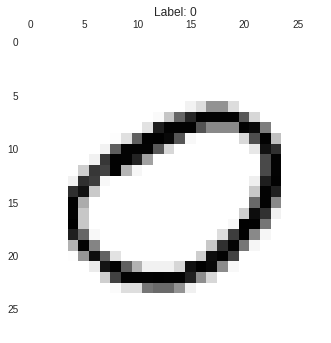

In [7]:
random_number = randint(0,60000)
image = train_MNIST_images[random_number]
label = train_MNIST_labels[random_number]

display_image(image, label)

#2. Making an image classifcation model

Now that the data is imported lets build a model!

Create a model that has at least 90% accuracy on test data.

In [0]:
MNIST_model = model_train(, #Steps
                          [], #Layers seperated by commas
                          train_MNIST_images, #Input data/features
                          train_MNIST_labels, #Input labels
                          , #Number of train and validation images, less then 60,000
                          , #Percent validation, float between 0 and 1
                          50 #Validation steps, prevents overfitting
                          )
loss_acc(MNIST_model, test_MNIST_images, test_MNIST_labels)

###Solution

In [0]:
MNIST_model = model_train(250, #Steps
                          [32, 10], #Layers seperated by commas
                          train_MNIST_images, #Input data/features
                          train_MNIST_labels, #Input labels
                          40000, #Num images, less then 60,000
                          0.3, #Percent validation, float between 0 and 1
                          50 #Validation steps, prevents overfitting
                          )
loss_acc(MNIST_model, test_MNIST_images, test_MNIST_labels)

#Predicting Images
Now that we have our model let's see how our model does at predicting images from our test set. 

In [0]:
def predict_image(image, model, actual_label): #outputs an image along with what the model predicts, and true label
  predicted_label=predict_image_label(model, image)
  _, ax = plt.subplots()
  ax.matshow(image.reshape(28, 28))
  ax.set_xlabel("Label: %s" % (actual_label), fontsize=15)
  ax.set_title("Predicted: %s" % (predicted_label), fontsize=20)
  ax.grid(False)

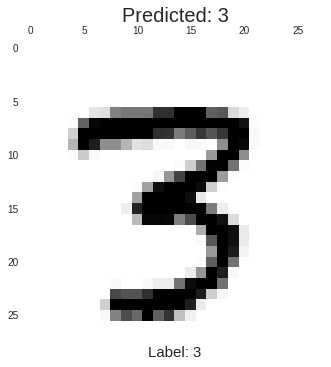

In [59]:
random_number = randint(0,60000) # 
image = train_MNIST_images[random_number]
label = train_MNIST_labels[random_number]

predict_image(image, MNIST_model, label)

While this is an intresting demonstration lets see some statistical data. You will look at the final accuracy and a confusion Matrix for the model

A confusion Matrix displays the predicted vs actual label. Try changing your model and see how the confusion matrix changes.



In [0]:
def stats(model, num_images, images, labels): #prints out the basic stats, and a confusion matrix
  images = images[:num_images]
  labels = labels[:num_images]
  confusion_matrix(model, images, labels)
  loss_acc(model, images, labels)
  #If you have more tests add them here
  
def confusion_matrix(model, images, labels): #graph of predicted label to actual label 
  final_predictions = predict_group(images, model)
  cm = metrics.confusion_matrix(labels, final_predictions)
  cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  ax = sns.heatmap(cm_normalized, cmap="bone_r")
  ax.set_aspect(1)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()
  
def predict_group(images, model): #predicts the labels for a list of images
  holder_list=[]
  for x in range (0,len(images)):
    holder = predict_image_label(model, images[x])
    holder_list.append(holder)
  return holder_list

In [0]:
stats(MNIST_model, #model you are testing
     1000, #number of images to use for stats, less then 10,000
     test_MNIST_images, #Test images
     test_MNIST_labels) #Test labels

##Optional


###Kaggle MNIST competition
If you feel confident in your model try entering it in the [Kaggle MNIST competition](https://www.kaggle.com/c/digit-recognizer). The following is set up so you can run the cell below and it will output a CSV that you can enter with. 

The authors record is 35th place, with a perfect accuracy. The shape of their model is 9 layers with a total of 4160 nodes trained on all avalible data for 1.5 million steps. What **intentional** mistake did they make.

Note: *This is designed for google colab, if you are using a diffrent enviorment you may have to change the last line to download the CSV.*

In [0]:
#opens the kaggle data
from google.colab import auth
from google.colab import files
auth.authenticate_user()
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')
from oauth2client.client import GoogleCredentials
def driveDownloader(fileName): #This is used to import from google drive
  file_id = fileName
  import io
  from googleapiclient.http import MediaIoBaseDownload
  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    _, done = downloader.next_chunk()

  downloaded.seek(0)
  return downloaded
print("Downloading data")
kaggle_mnist_data = pd.read_csv(driveDownloader('17jgy4ubFVlngqZLgsLyh5tqLNizE-sOM'), sep=",") #gets the file from google drive
kaggle_mnist_data = kaggle_mnist_data.as_matrix()
kaggle_mnist_data = kaggle_mnist_data/256

image_ids = []
for x in range (0,len(kaggle_mnist_data)):
  image_ids.append(x+1)
print("Making predictions")
predictions_for_kaggle = predict_group(kaggle_mnist_data, #the unlabeled images
                                       MNIST_model) #the model you are using

merged_lists = list(zip(image_ids,predictions_for_kaggle))
df = pd.DataFrame(data = merged_lists, columns=['ImageId', 'Label']) #Makes a pandas dataframe
print("Making CSV")
df.to_csv("Kaggle_MNIST_submission.csv", index=False) #turns the pandas dataframe into a CSV
files.download("Kaggle_MNIST_submission.csv") #downloads the file

#3. The Fashion MNIST
![alt text](https://markusthill.github.io/images/2017-10-12-zalandos-fashion-mnist-dataset/zalando10x10.jpeg)

*Credit: Mark Thill via Github*

The Fashion MNIST is a derivative of the MNIST dataset. It also has 60,000 training images and 10,000 test images that are grayscale in a 28 by 28 size. The diffrence is that the Fahion MNIST contains... fashion. 

Here are the categories, and associated numbers
0.   T-shirt/top
1.   Trouser 
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle Boot

Your goal is to create a model using the steps above that can achieve at least a 80% accuracy on **test** data.


In [0]:
#Run the following, DON'T change
from keras.datasets import fashion_mnist
(train_fashion_images, train_fashion_labels), (test_fashion_images, test_fashion_labels) = fashion_mnist.load_data()

def predict_fashion_image(image, model, actual_label): #outputs an image along with what the model predicts, and true label
  predicted_label = fashion_num_to_label(predict_image_label(model, image))
  _, ax = plt.subplots()
  ax.matshow(image.reshape(28, 28))
  ax.set_xlabel("Label: %s" % (actual_label), fontsize=15)
  ax.set_title("Predicted: %s" % (predicted_label), fontsize=20)
  ax.grid(False)

##Pre-Process the data
The fashion MNIST has the same dimentsions as the MNIST dataset. Look at the code for pre-processing the MNIST data and prepare the data in the same way.

In [0]:
train_fashion_images = ...
test_fashion_images = ...

###Solution

In [0]:
test_fashion_images = test_fashion_images.reshape(-1, 28 * 28)/256
train_fashion_images = train_fashion_images.reshape(-1, 28 * 28)/256

##Display an image

In [0]:
random_number = randint(0,60000)
image = train_fashion_images[random_number]
label = "" #make a function that takes a number and outputs the associated string

display_image(image, label)

print("Number label is: ", train_fashion_labels[random_number])

##Changing numbers to strings using lists 
While it is possible to write ten if statements, it would be time consuming. The easiest way to change a small number to a string is using lists.

In [0]:
flowers = ["Roses", "Dasies", "Tulips", "Orchids", "Carnations"]

In [0]:
print(flowers[0])
print(flowers[1])
print(flowers[4])

Because our data is labeled as an integer from 0 to 9, we can use lists to change the numbers to integers.

In [0]:
def fashion_num_to_label(label_num):
  fashion_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
  label = ...
  return label

Test your function and then add to the display function above.

In [0]:
print("T-shirt/top = ", fashion_num_to_label(0))
print("Coat = ", fashion_num_to_label(4))

###Solution

In [0]:
def fashion_num_to_label(label_num):
  fashion_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
  label = fashion_labels[label_num]
  return label

##Train a model

After the data is prepared train a model.

Make sure that `model_train()` is intialized above.



In [0]:
fashion_MNIST_model = model_train(, #Steps
                                  , #Layers seperated by commas
                                  , #Input data/features
                                  , #Input labels
                                  , #Number of train and validation images, less then 60,000
                                  , #Percent validation, float between 0 and 1
                                  #Validation steps, prevents overfitting
                                  )
loss_acc(fashion_MNIST_model, test_fashion_images, test_fashion_labels)

###Solution

In [0]:
fashion_MNIST_model = model_train(1000, #Steps
                                  [64,32], #Layers seperated by commas
                                  train_fashion_images, #Input data/features
                                  train_fashion_labels, #Input labels
                                  40000, #Number of train and validation images, less then 60,000
                                  0.3, #Percent validation, float between 0 and 1
                                  50 #Validation steps, prevents overfitting
                                  )
loss_acc(fashion_MNIST_model, test_fashion_images, test_fashion_labels)

##Visualize results
Display an image, and it's prediction

**Prerequisite:**  Complete ```fashion_num_to_label()``` function



In [0]:
random_image_num = #There are 10000 test images
image = ...
label = ...
predict_fashion_image(image, 
                      , #Model name
                      label
                      )

###Solution

In [0]:
random_image_num = randint(0,10000) #There are 10000 test images
image = test_fashion_images[random_image_num]
label = fashion_num_to_label(test_fashion_labels[random_image_num])
predict_fashion_image(image, 
                      fashion_MNIST_model,
                      label
                      )

##Stats
Display the stats of your model. 

In [0]:
stats(, #model name
      , #number of images, less then 10,000
      , #test images
      , # test labels
     )

###Solution

In [0]:
stats(fashion_MNIST_model, #model name
      5000, #number of images, less then 10,000
      test_fashion_images, #test images
      test_fashion_labels, # test labels
     )

#Mobile Version of Image Recognition Model

Want to see how your model preforms in the real world? If you have an Android phone you can download [this](https://) app. There is no iOS version.

Steps for using app:

1. Create a tflite model, and save it to your phone
2. Download the app to your Android phone
3. Select use your own model
4. Find the model
5. Have fun!

Note: *The author of this notebook is currently working on the app. However they are backed-up with other projects, and has a condtion which forces themselves to talk in the third person*

Note 2: This code is designed for Google Colabs, if you want to download your model, edit the last line.

In [0]:
def model_mobile_download(model):
  from google.colab import files
  keras_file = "keras_model.h5"
  model.save(keras_file)
  converter = tf.contrib.lite.TFLiteConverter.from_keras_model_file(keras_file)
  tflite_model = converter.convert()
  open("converted_model.tflite", "wb").write(tflite_model)
  files.download("converted_model.tflite")
  

In [0]:
model_mobile_download(MNIST_model #model name
                     )